# Part II - (Presentation Title)
## by (NANCHI GUMUT)


## Investigation Overview

>In this investigation, I wanted to look at the variables of diamonds that influence how long a ride lasts. The main focus was on gender, user_type, duration of the day and age of the rider


## Dataset Overview

> The Ford GoBike System Dataset has 183412 rows and  16 columns after the clean up process, I had 174952 rows and 22 columns

> There are 11 numeric variables (duration_sec, start_time, end_time, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bike_id, member_birth_year) and 5 categoric variables (start_station_name, end_station_name, user_type, member_gender,bike_share_for_all_trip)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
biketrips = pd.read_csv("201902-fordgobike-tripdata.csv")
biketrips_clean = biketrips.copy()
biketrips_clean['start_time'] = pd.to_datetime(biketrips['start_time'])
biketrips_clean['end_time'] = pd.to_datetime(biketrips['end_time'])

biketrips_clean['start_station_id'] = biketrips['start_station_id'].astype('str')
biketrips_clean['end_station_id'] = biketrips['end_station_id'].astype('str')
biketrips['bike_id'] = biketrips['bike_id'].astype('str')

biketrips_clean['user_type'] = biketrips['user_type'].astype('category')
biketrips_clean['member_gender'] = biketrips['member_gender'].astype('category')
biketrips_clean['bike_share_for_all_trip'] = biketrips['bike_share_for_all_trip'].astype('category')

biketrips_clean.info(null_counts=True)
biketrips_clean['duration_minute'] = biketrips_clean['duration_sec']/60
biketrips_clean['start_date'] = biketrips_clean.start_time.dt.strftime('%Y-%m-%d')
biketrips_clean['start_hour_of_the_day'] = biketrips_clean.start_time.dt.strftime('%H')
biketrips_clean['start_day_per_week'] = biketrips_clean.start_time.dt.strftime('%A')
biketrips_clean['start_month'] = biketrips_clean.start_time.dt.strftime('%B')
biketrips_clean['period'] = (biketrips_clean['start_time'].dt.hour % 24 + 4) // 4
biketrips_clean['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
biketrips_clean['member_age'] = 2019 - biketrips_clean['member_birth_year']
age_intervals=np.arange(18, biketrips_clean['member_age'].max()+5,5).astype(int)
age_labels=[f'{age_intervals[i]}-{age_intervals[i+1]}' for i in range (len(age_intervals)-1)]
biketrips_clean['age_intervals']=pd.cut(biketrips_clean['member_age'],age_intervals, labels=age_labels, include_lowest=True)
biketrips_clean['age_intervals'].value_counts().sort_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(2), ob

18-23      15569
23-28      41156
28-33      43857
33-38      28879
38-43      16777
43-48      11049
48-53       7236
53-58       5663
58-63       3147
63-68        962
68-73        482
73-78        167
78-83         14
83-88        111
88-93          3
93-98          0
98-103         3
103-108        0
108-113        1
113-118       17
118-123       53
123-128        0
128-133        0
133-138        0
138-143        1
Name: age_intervals, dtype: int64

# Explanatory Data Visualizations

## Distribution of Gender, Period of the day and age of  Riders

> In investigating the factors affecting duration of the trips, I have plotted 3 distributions (gender, period and age) to know their tally against the entire dataset

> Male gender feature most prominently in the dataset, most rides start in the morning and evenings and large block of the riders are between 23 and 38 years old

In [3]:
def countPlot(data, x, color, order=None):
    plt.figure(figsize=[14,6])
    sb.countplot(data=data,edgecolor='black', x=x, color=color, order=order);
    x=x.replace('_',' ')
    plt.title(f'''Distribution of {x} '''.title(), fontsize=14, weight='bold')
    plt.xlabel(x.title(),fontsize=10, weight='bold')
    plt.ylabel('Frequency'.title(),fontsize=10, weight='bold')
    #plt.xlabel(xlabel);
    #plt.ylabel(ylabel);
    #plt.xticks(rotation=45)

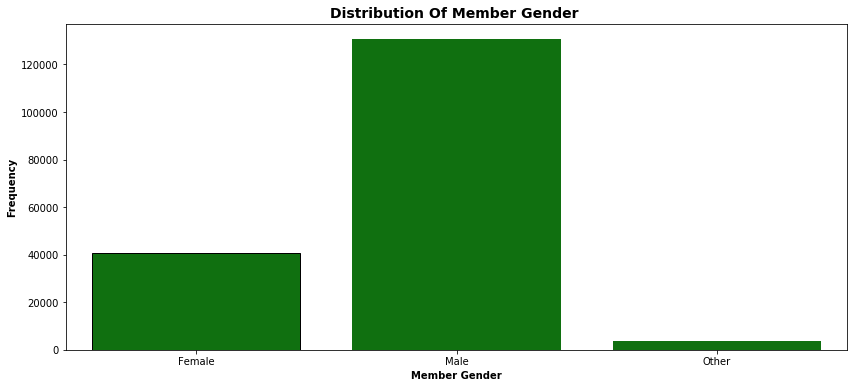

In [4]:
countPlot(data=biketrips_clean, x='member_gender', color='green')

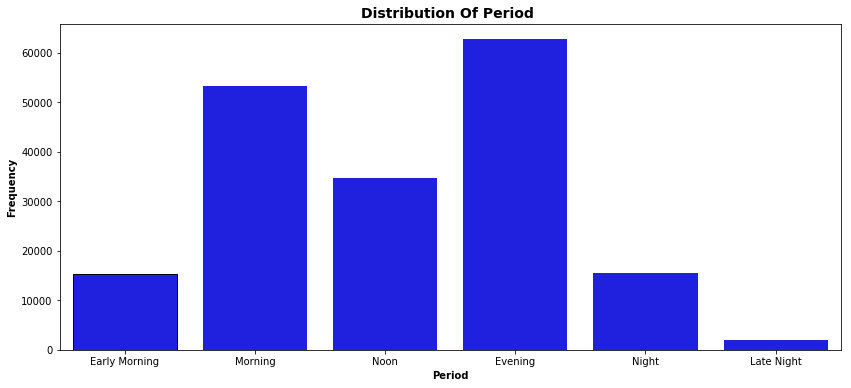

In [5]:
countPlot(data=biketrips_clean, x='period', color='blue', order=[
                       'Early Morning',
                       'Morning',
                      'Noon',
                      'Evening',
                       'Night', 'Late Night'])

Text(0.5,1,'Distribution Of Age ')

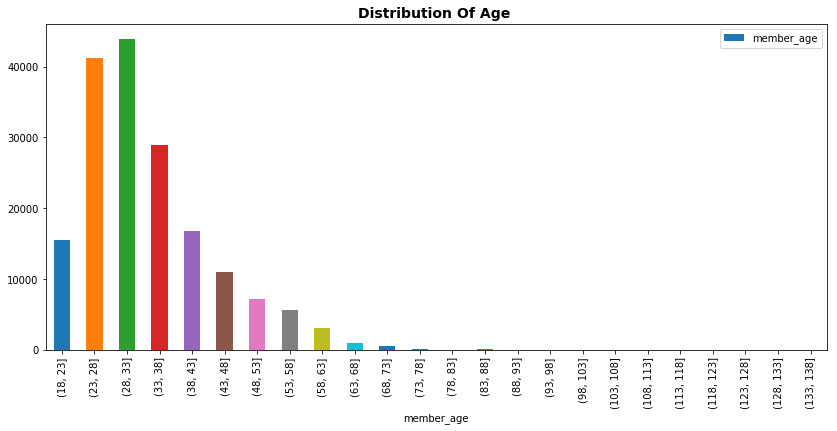

In [6]:
plt.figure(figsize=[14,6])
member_age_df =biketrips_clean['member_age']
member_age_df.groupby(pd.cut(biketrips_clean['member_age'], np.arange(18,141,5))).count().plot.bar(legend=True)
plt.title(f'''Distribution of Age '''.title(), fontsize=14, weight='bold')

## Member age Vs Duration of Ride

> Most rides are completed under 100minutes. Young adults make up majority of the dataset. Very few rides extend beyond 300minutes. As expected, it appears the older people spend less time on the rides. 

Text(0.5,1,'Member Age Vs Duration(Minute)')

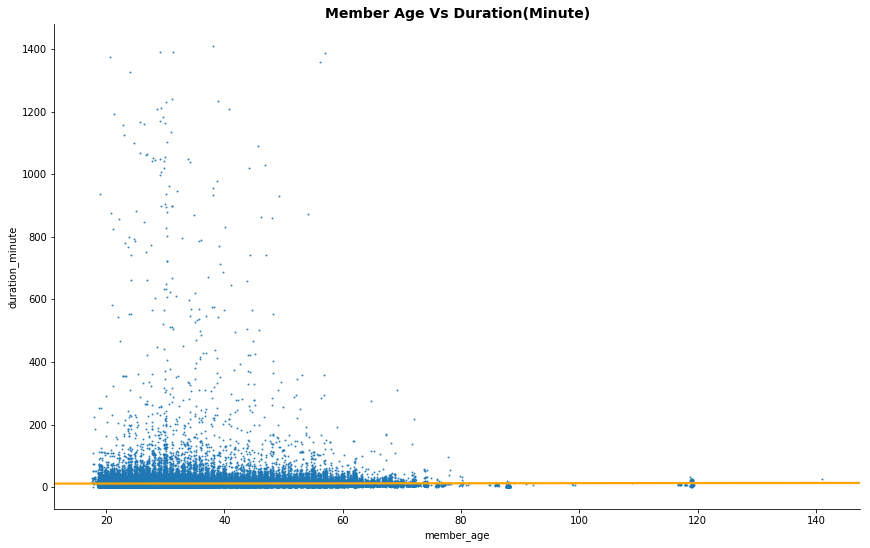

In [7]:
g=sb.lmplot(data=biketrips_clean,x="member_age", y="duration_minute", 
            x_jitter=0.35,scatter_kws={'s':1}, line_kws={'color':'orange'})
g.fig.set_size_inches(14,8)
plt.title('Member Age Vs Duration(Minute)'.title(), fontsize=14, weight='bold')

## Member age Vs Duration of Ride vs Gender

> The male gender features most prominiently in the dataset. There however appears to be no correlation between gender and duration of the trip.

Text(0.5,1,'Member Age Vs Duration(Minute) (Excluding Outliers)')

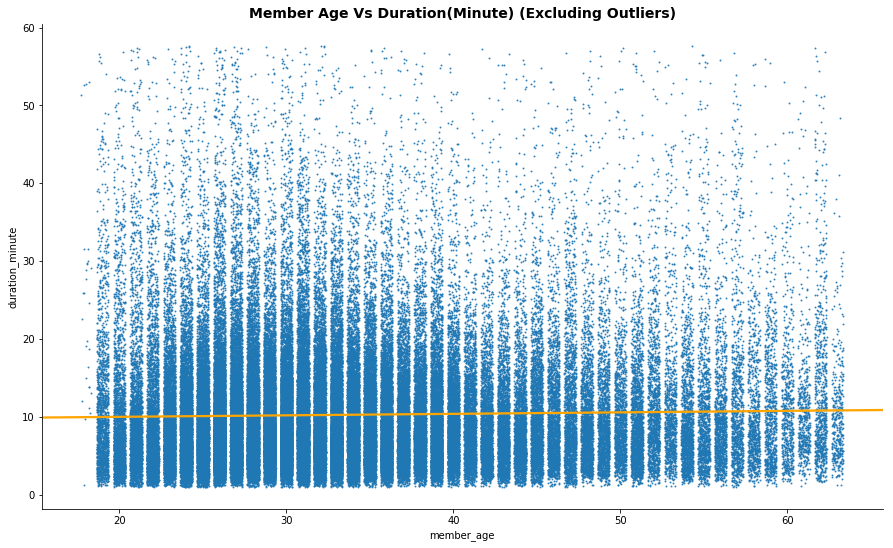

In [8]:
g=sb.lmplot(data=biketrips_clean.query('member_age<member_age.quantile(0.99) and duration_minute<duration_minute.quantile(0.99)'), x='member_age' , y= 'duration_minute',
x_jitter=0.35,scatter_kws={'s':1}, line_kws
={'color' :'orange'})
g.fig.set_size_inches(14,8);
plt.title('Member Age Vs Duration(Minute) (Excluding Outliers)'.title(), fontsize=14, weight='bold')

##  member_gender vs user_type

> Subscribers are more than customers. The pattern of the period of the day when most rides take place is same for all genders. Most rides happern in the morning and in the evenings


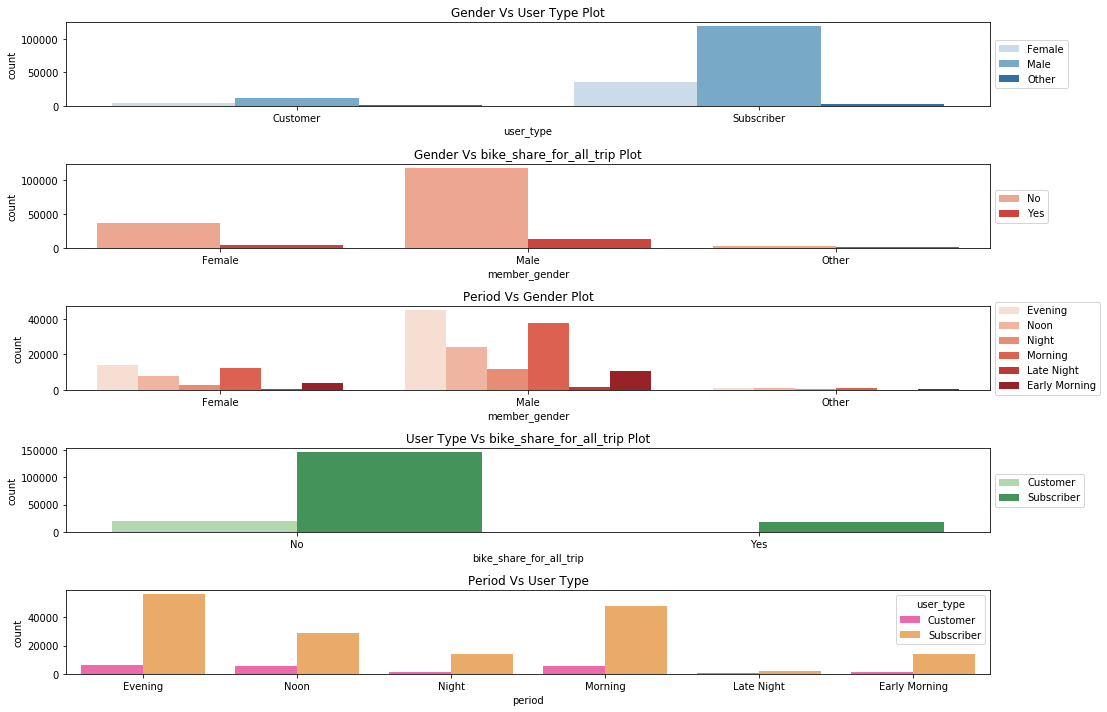

In [9]:
#Categorical values plot
plt.figure(figsize = [14, 10])
#'user_type', 'member_gender','bike_share_for_all_trip'
ax = plt.subplot(5, 1, 1)
sb.countplot(data = biketrips_clean, x = 'user_type', hue = 'member_gender', palette = 'Blues').set(title='Gender Vs User Type Plot')
ax.legend(loc = 'center left',bbox_to_anchor=(1,0.5))
# subplot 2: member_gender vs. bike_share_for_all_trip
ax = plt.subplot(5, 1, 2)
sb.countplot(data = biketrips_clean, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Reds').set(title='Gender Vs bike_share_for_all_trip Plot')
ax.legend(loc = 'center left',bbox_to_anchor=(1,0.5)) # re-arrange legend to reduce overlapping

# subplot 3: member_gender vs. Period of day
ax = plt.subplot(5, 1, 3)
sb.countplot(data = biketrips_clean, x = 'member_gender', hue = 'period', palette = 'Reds').set(title='Period Vs Gender Plot')
ax.legend(loc = 'center left',bbox_to_anchor=(1,0.5)) # re-arrange legend to reduce overlapping

# subplot 4: bike_share_for_all_trip vs. user_type, use different color palette
ax = plt.subplot(5, 1, 4)
sb.countplot(data = biketrips_clean, x = 'bike_share_for_all_trip', hue = 'user_type', palette = 'Greens').set(title='User Type Vs bike_share_for_all_trip Plot')
ax.legend(loc = 'center left',bbox_to_anchor=(1,0.5)) # re-arrange legend to remove overlapping

# subplot 5: period vs. user_type, use different color palette
plt.subplot(5, 1, 5)
sb.countplot(data = biketrips_clean, x = 'period', hue = 'user_type', palette = 'spring').set(title='Period Vs User Type')
ax.legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.tight_layout();
plt.show()

## user_type vs duration_minute vs member_gender  and period vs member_age vs member_gender

> Customers of any gender tend to spend more time on the rides than subscribers
  Subscribers of any gender tend to be older than customers of any gender



Text(0.5,1,'Member Gender Vs Period Vs User Type')

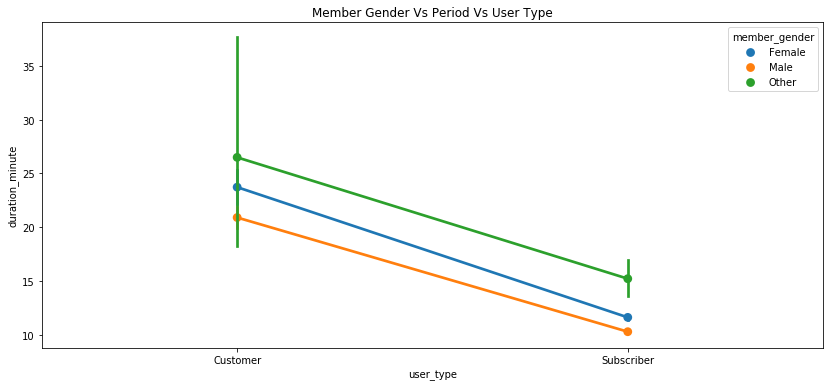

In [10]:

plt.figure(figsize=[14,6])
sb.pointplot(x="user_type", y="duration_minute", hue="member_gender", data=biketrips_clean);
plt.title("Member Gender Vs Period Vs User Type")

Text(0.5,1,'Member Gender Vs Member Age Vs Period')

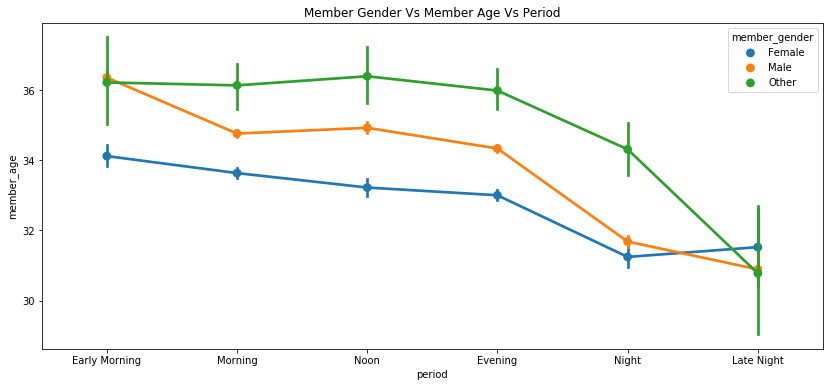

In [11]:
plt.figure(figsize=[14,6])
sb.pointplot(x="period", y="member_age", hue="member_gender", data=biketrips_clean, order=[
                       'Early Morning',
                       'Morning',
                      'Noon',
                      'Evening',
                       'Night', 'Late Night']);
#plt.xticks(rotation=45)
plt.title("Member Gender Vs Member Age Vs Period")

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [15]:
#!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 284369 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

In [13]:
# Use this command if you are running this file in local
#!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


In [16]:
!zip -r my_project.zip .

  adding: 201902-fordgobike-tripdata.csv (deflated 82%)
  adding: README.md (deflated 56%)
  adding: Part_I_exploration_template.pdf (deflated 10%)
  adding: Part_I_exploration_template.ipynb (deflated 31%)
  adding: Part_II_slide_deck_template.ipynb (deflated 28%)
  adding: .ipynb_checkpoints/ (stored 0%)
  adding: .ipynb_checkpoints/.ipynb-checkpoint (deflated 34%)
  adding: .ipynb_checkpoints/Part_I_exploration_template-checkpoint.ipynb (deflated 30%)
  adding: .ipynb_checkpoints/Part_II_slide_deck_template-checkpoint.ipynb (deflated 27%)
  adding: .ipynb (deflated 34%)
  adding: Part_II_slide_deck_template.slides.html (deflated 83%)
